In [31]:
import numpy
import pandas
import matplotlib.pyplot as plt
import scipy

15.1 Koirien keski-ikä noudattaa normaalijakaumaa. Satunnaisotannalla tehdyn 160 koiran otoksen perusteella keski-ikä on 18,2 vuotta ja keskihajonta on 4,5 vuotta. Virhemarginaali oli 0,7 vuotta 95 % luottamustasolla. Mikä on otoksen keskiarvon luottamusväli? Mikä on otoksen keskiarvon keskivirhe?

In [44]:
## Code here
# X ~ N(0, 1)
size_of_sample = 160
avg_age = 18.2
std_age = 4.5
err_margin = 0.7
trust_level = 0.95

avg_error_of_mean = std_age / numpy.sqrt(size_of_sample)
print("Average error of mean: ", avg_error_of_mean)

confidence_interval = scipy.stats.norm.interval(trust_level, loc=avg_age, scale=avg_error_of_mean)
print("Confidence interval: ", confidence_interval)

Average error of mean:  0.35575623676894264
Confidence interval:  (17.502730588657368, 18.89726941134263)


15.2 Laske edellisen tehtävän perusteella todennäköisyys, että yksittäisen koiran ikä on yli 20 vuotta. Mikä on todennäköisyys, että 160 koiran otoksen keskiarvo on enintään 18 vuotta?

In [47]:
# Probability that a single dog's age is over 20
prob_of_over_20 = 1 - scipy.stats.norm.cdf(20, loc=avg_age, scale=std_age)
print("Probability of a single dog's age over 20: ", prob_of_over_20)

# Probability that the sample mean is at most 18
prob_of_avg_max_18 = scipy.stats.norm.cdf(18, loc=avg_age, scale=std_age / (size_of_sample ** 0.5))
print("Probability of the sample mean at most 18: ", prob_of_avg_max_18)

Probability of a single dog's age over 20:  0.3445782583896757
Probability of the sample mean at most 18:  0.28699577521143077


15.3 Laske tehtävän 15.1 otoksen luottamusväli 95 % luottamustasolla. Huomaa, että saat saman tuloksen kuin tehtävässä kerrotulla virhemarginaalilla. Mikä on luottamusväli 99 % luottamustasolla?

In [48]:
## Code here
trust_interval = [18.2 - 1.96 * avg_error_of_mean, 18.2 + 1.96 * avg_error_of_mean]
print("Trust interval: ", trust_interval)

trust_interval_99 = [18.2 - 2.58 * avg_error_of_mean, 18.2 + 2.58 * avg_error_of_mean]
print("Trust interval 99: ", trust_interval_99)

Trust interval:  [17.502717775932872, 18.897282224067126]
Trust interval 99:  [17.282148909136126, 19.117851090863873]


15.4 Tilastokeskuksen mukaan koirien keski-ikä on 17,8 vuotta. Laske tämän väitetyn keskiarvon 𝑧-arvo ja 𝑝-arvo. Voidaanko tähän väitettyyn keskiarvoon luottaa 95 % tai 99 % luottamustasolla?

In [35]:
## Code here
avg_age = 17.8

z_value = (avg_age - 18.2) / avg_error_of_mean
print("Z value: ", z_value)

p_value = scipy.stats.norm.sf(abs(z_value))
print("P value: ", p_value)

print("the avg can be trusted on 95: ", p_value > 0.05)
print("and on 99: ", p_value > 0.01)


Z value:  -1.1243653902820865
P value:  0.1304290241151596
the avg can be trusted on 95:  True
and on 99:  True


15.5 Lääkeaineen paketissa ilmoitetaan yhden pillerin painoksi 600 𝑚𝑔. Lääkevirasto päättää testata tämän väitteen paikkansa pitävyyttä ottamalla 150 pillerin otoksen ja punnitsemalla pillerit. Keskiarvoksi saatiin 602,3 𝑚𝑔 ja keskihajonnaksi 6,3 𝑚𝑔. Voidaanko lääkeaineen paketin ilmoitukseen luottaa 95 % luottamustasolla?

In [36]:
## Code here
true_avg = 600

sample_size = 150
sample_avg = 602.3
sample_std = 6.3

z_value = (sample_avg - true_avg) / (sample_std / numpy.sqrt(sample_size))
p_value = scipy.stats.norm.sf(abs(z_value))

print("P value: ", p_value)
print("the avg can be trusted on 95: ", p_value > 0.05)

P value:  3.887444579061199e-06
the avg can be trusted on 95:  False


15.6 Suomen järvistä kalastettujen ahvenien keskimääräiseksi painoksi on pitkällä aikavälillä muodostunut 570 𝑔. Tätä testataan ottamalla 60 ahvenen otos, jonka keskiarvoksi saadaan 563 𝑔 ja keskihajonnaksi 63,7 𝑔. Onko pitkän aikavälin keskiarvo luotettava 99 % luottamustasolla? Kuinka suuri otoskoon pitäisi olla, että se ei olisi luotettava tällä luottamustasolla (tämän voi selvittää kokeilemalla)? Otoksen keskiarvon ja keskihajonnan oletetaan pysyvän samana.

P value:  0.1973277065164603
the avg can be trusted on 95:  True


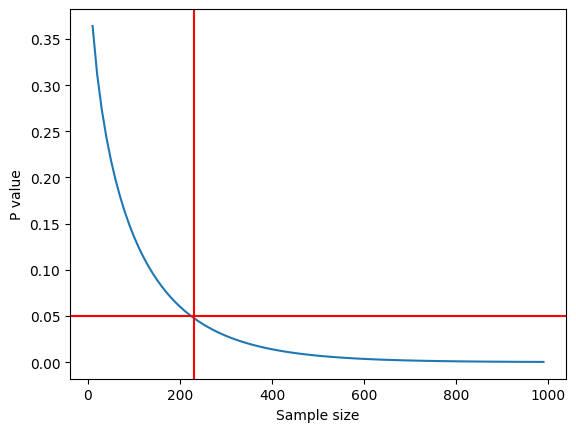

Sample size:  230


In [43]:
## Code here
true_avg = 570

sample_size = 60
sample_avg = 563
sample_std = 63.7

z_value = (sample_avg - true_avg) / (sample_std / numpy.sqrt(sample_size))
p_value = scipy.stats.norm.sf(abs(z_value))

print("P value: ", p_value)
print("the avg can be trusted on 95: ", p_value > 0.05)

# lets plot the p value for different sample sizes
sample_sizes = numpy.arange(10, 1000, 10)
p_values = []
for sample_size in sample_sizes:
    sample_avg = 563
    sample_std = 63.7

    z_value = (sample_avg - true_avg) / (sample_std / numpy.sqrt(sample_size))
    p_value = scipy.stats.norm.sf(abs(z_value))
    p_values.append(p_value)

# lets draw a line from the point where the p value is 0.05¨
plt.plot(sample_sizes, p_values)
plt.xlabel("Sample size")
plt.ylabel("P value")
plt.axhline(y=0.05, color='r', linestyle='-')
plt.axvline(x=230, color='r', linestyle='-')
plt.show()

We can come to a conclusion that somewhere after samplesize of 230 the true avg is not anymore trustworthy with 95%